In [134]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as st

from sklearn.model_selection import train_test_split
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.metrics import accuracy_score

# 1. Загрузим файл HR.csv в pandas dataframe

In [41]:
df = pd.read_csv("HR.csv", encoding='utf-8')
df.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


# 2. Посмотрим основные статистики

In [3]:
df.describe()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years
count,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000
mean,0.612834,0.716102,3.803054,201.050337,3.498233,0.144610,0.238083,0.021268
std,0.248631,0.171169,1.232592,49.943099,1.460136,0.351719,0.425924,0.144281
min,0.090000,0.360000,2.000000,96.000000,2.000000,0.000000,0.000000,0.000000
25%,0.440000,0.560000,3.000000,156.000000,3.000000,0.000000,0.000000,0.000000
50%,0.640000,0.720000,4.000000,200.000000,3.000000,0.000000,0.000000,0.000000
75%,0.820000,0.870000,5.000000,245.000000,4.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,7.000000,310.000000,10.000000,1.000000,1.000000,1.000000


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   satisfaction_level     14999 non-null  float64
 1   last_evaluation        14999 non-null  float64
 2   number_project         14999 non-null  int64  
 3   average_montly_hours   14999 non-null  int64  
 4   time_spend_company     14999 non-null  int64  
 5   Work_accident          14999 non-null  int64  
 6   left                   14999 non-null  int64  
 7   promotion_last_5years  14999 non-null  int64  
 8   department             14999 non-null  object 
 9   salary                 14999 non-null  object 
dtypes: float64(2), int64(6), object(2)
memory usage: 1.1+ MB


# 3. Корреляционная матрица.

In [5]:
corr = df.corr().round(3)
corr.style.background_gradient(cmap='coolwarm')

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years
satisfaction_level,1.000000,0.105000,-0.143000,-0.020000,-0.101000,0.059000,-0.388000,0.026000
last_evaluation,0.105000,1.000000,0.349000,0.340000,0.132000,-0.007000,0.007000,-0.009000
number_project,-0.143000,0.349000,1.000000,0.417000,0.197000,-0.005000,0.024000,-0.006000
average_montly_hours,-0.020000,0.340000,0.417000,1.000000,0.128000,-0.010000,0.071000,-0.004000
time_spend_company,-0.101000,0.132000,0.197000,0.128000,1.000000,0.002000,0.145000,0.067000
Work_accident,0.059000,-0.007000,-0.005000,-0.010000,0.002000,1.000000,-0.155000,0.039000
left,-0.388000,0.007000,0.024000,0.071000,0.145000,-0.155000,1.000000,-0.062000
promotion_last_5years,0.026000,-0.009000,-0.006000,-0.004000,0.067000,0.039000,-0.062000,1.000000


Самые скоррелированные это average_montly_hours и number_project.
Наименее скореллированные те, которые по модулю ближе к 0. Например, promotion_last_5years и average_montly_hours

# 4. Сколько сотрудников в каждом отделе

In [6]:
df.loc[df['left'] == 0].groupby('department').count()['last_evaluation']

department
IT              954
RandD           666
accounting      563
hr              524
management      539
marketing       655
product_mng     704
sales          3126
support        1674
technical      2023
Name: last_evaluation, dtype: int64

# 5. Распределение сотрудников по зарплатам

In [7]:
df_salary = df.groupby('salary').count()['last_evaluation'].copy()
df_salary

salary
high      1237
low       7316
medium    6446
Name: last_evaluation, dtype: int64

<AxesSubplot:ylabel='salary'>

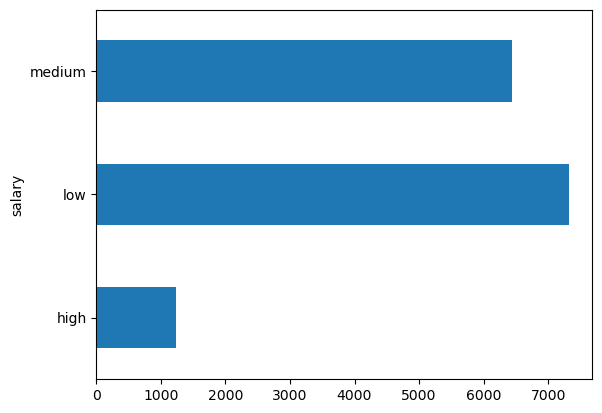

In [46]:
# визуализируем

df_salary.plot(kind="barh")

# 6. Распределение сотрудников по зарплатам в каждом департаменте

In [14]:
df_department_salary = df.groupby(['department','salary']).count()['last_evaluation'].copy()
df_department_salary

department   salary
IT           high        83
             low        609
             medium     535
RandD        high        51
             low        364
             medium     372
accounting   high        74
             low        358
             medium     335
hr           high        45
             low        335
             medium     359
management   high       225
             low        180
             medium     225
marketing    high        80
             low        402
             medium     376
product_mng  high        68
             low        451
             medium     383
sales        high       269
             low       2099
             medium    1772
support      high       141
             low       1146
             medium     942
technical    high       201
             low       1372
             medium    1147
Name: last_evaluation, dtype: int64

<AxesSubplot:ylabel='department,salary'>

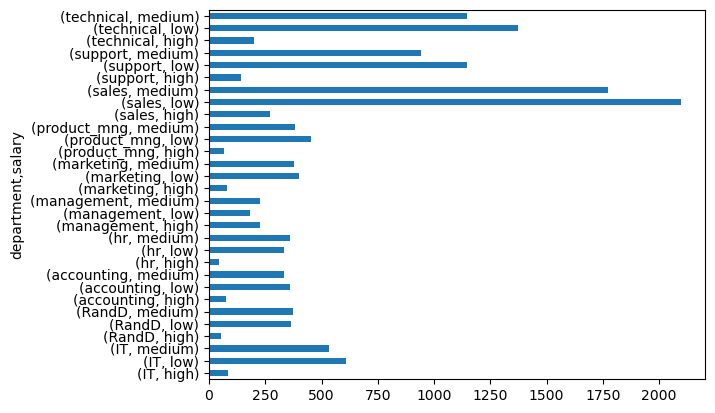

In [15]:
# построим график

df_department_salary.plot.barh()

# 7. Проверим гипотезу, что сотрудники с высоким окладом проводят на работе больше времени, чем сотрудники с низким

In [37]:
df_low = df[df['salary'] == 'low']['average_montly_hours'].copy()
df_high = df[df['salary'] == 'high']['average_montly_hours'].copy()

In [35]:
# Гипотеза Н0: выборки одинаковы (количество часов не зависит от дохода)
# Гипотеза Н1: выборки различны (количество часов зависит от дохода)
# произведем выборки, используя критерий стьюдента

stat, p = st.ttest_ind(df_low, df_high)
print(f'stat = {stat}; p = {p}')
if p > 0.05:
    print('Выборки статистчески равны')
else:
    print('Выборки статистчески различаются')

stat = 0.7288680398062308; p = 0.4661023478267259
Выборки статистчески равны


(array([11., 21., 21., 17., 56., 64., 72., 81., 59., 86., 52., 70., 47.,
        77., 55., 69., 63., 53., 68., 73., 73., 26., 18.,  3.,  2.]),
 array([ 96.  , 104.44, 112.88, 121.32, 129.76, 138.2 , 146.64, 155.08,
        163.52, 171.96, 180.4 , 188.84, 197.28, 205.72, 214.16, 222.6 ,
        231.04, 239.48, 247.92, 256.36, 264.8 , 273.24, 281.68, 290.12,
        298.56, 307.  ]),
 <BarContainer object of 25 artists>)

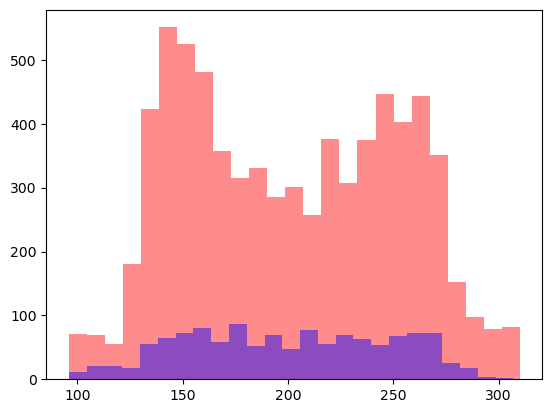

In [40]:
# Построим гистограмму, что бы визуально оценить результаты
# Визуально кажется, что существенных отличий нет

plt.hist(df_low, bins=25, alpha=0.45, color='red')
plt.hist(df_high, bins=25, alpha=0.45, color='blue')

**Вывод:** принимаем гипотезу Н0. Количество часов, проведенных на работе, не зависит от дохода.

# 8. Показатели среди уволившихся и не уволившихся сотрудников

In [54]:
# Доля сотрудников с повышением за последние 5 лет
# Средняя степень удовлетворенности
# Среднее количество проектов

df.groupby('left').mean().round(3)[['promotion_last_5years', 'satisfaction_level', 'number_project']]

,promotion_last_5years,satisfaction_level,number_project
left,,,
0,0.026,0.667,3.787
1,0.005,0.440,3.856


# 9. Построить модель LDA

In [145]:
# Формируем фреймы
X = df.drop(df[['left', 'department', 'salary']], axis=1)
y = df['left']
X

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years
0,0.38,0.53,2,157,3,0,0
1,0.80,0.86,5,262,6,0,0
2,0.11,0.88,7,272,4,0,0
3,0.72,0.87,5,223,5,0,0
4,0.37,0.52,2,159,3,0,0
...,...,...,...,...,...,...,...
14994,0.40,0.57,2,151,3,0,0
14995,0.37,0.48,2,160,3,0,0
14996,0.37,0.53,2,143,3,0,0
14997,0.11,0.96,6,280,4,0,0


In [146]:
# Разделяем на тренировочные и тестовые
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [147]:
X_train

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years
14480,0.38,0.86,6,139,6,0,0
1934,0.78,0.93,4,225,5,0,0
7900,0.56,0.71,5,243,3,0,0
2952,0.96,0.62,4,217,2,0,0
4367,0.83,0.53,3,211,4,1,0
...,...,...,...,...,...,...,...
5191,0.52,0.96,4,246,3,0,0
13418,0.49,0.65,4,233,7,0,0
5390,0.66,0.73,5,249,2,0,0
860,0.79,1.00,4,218,5,0,0


In [148]:
# Обучаем
lda = LinearDiscriminantAnalysis()
lda.fit(X_train, y_train)
lda

LinearDiscriminantAnalysis()

In [149]:
# Прогноз
y_predict = lda.predict(X_test)
print(len(y_predict))
print(y_predict)

3750
[0 0 0 ... 0 1 0]


In [150]:
# Разница факта и прогноза
result = pd.DataFrame([y_predict, y_test]).T
result.head(10)

,0,1
0,0,0
1,0,0
2,0,0
3,0,1
4,0,0
5,0,0
6,0,0
7,1,0
8,0,0
9,1,0


In [152]:
# Рассчитаем точность результатов

print(f'Точность модели: {accuracy_score(y_test, y_predict).round(3)}') 

Точность модели: 0.754
